In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

In [3]:
data = pd.read_csv("Mall_Customers.csv", index_col=0)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
##### statistical information about data  ##########
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


Female    112
Male       88
Name: Gender, dtype: int64


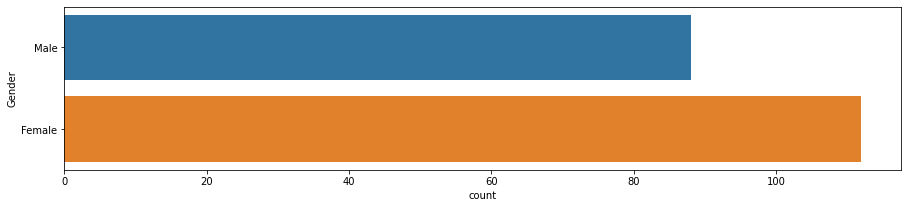

In [5]:
##### Total Males and Females in the data

print(data["Gender"].value_counts())

plt.figure(1 , figsize = (15 ,3))
sns.countplot(y = 'Gender' , data = data)
plt.show()

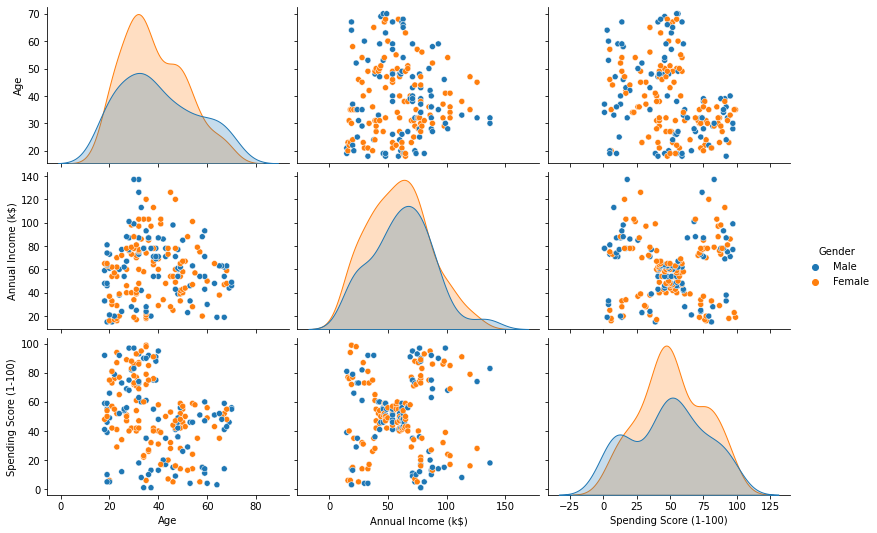

In [6]:
########### Genderwise Age, Income and Spending distributions ##############
sns.pairplot(data[data.columns[0:]],hue="Gender",aspect=1.5);

In [7]:
############### Males and females have been numerically replaced
############### with 1 and 0

for i in range(data.shape[0]):
    if data.iloc[i,0] == "Male":
        data.iloc[i,0] = 1
    elif data.iloc[i,0] == "Female":
        data.iloc[i,0] = 0

data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


Text(0.5, 0, 'Spending Score (1-100)')

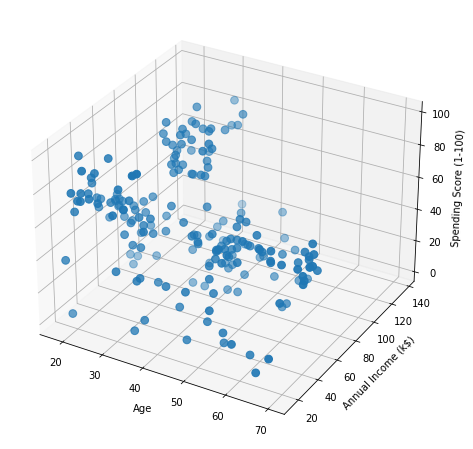

In [8]:
from mpl_toolkits.mplot3d import Axes3D

axis_list = data.columns[1:]
x,y,z = axis_list

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection="3d")
sc = ax.scatter(data[x],data[y],data[z],s=60)
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)

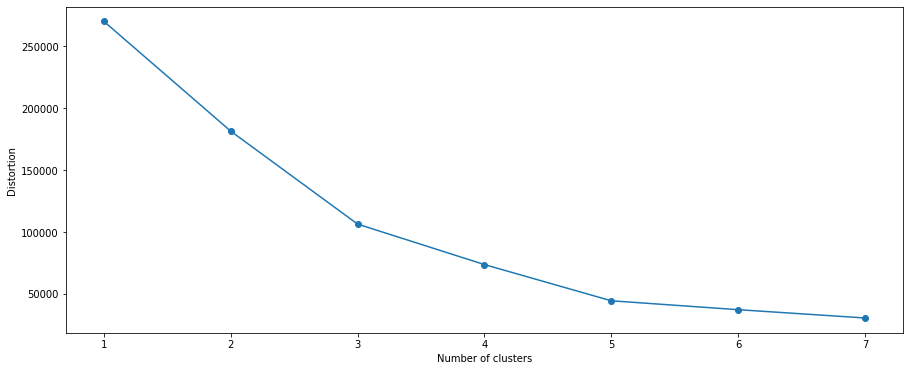

In [9]:
##########  Optimal number of clusters  #################

df = data.iloc[:,2:]
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 8):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df.values)
    distortions.append(km.inertia_)

# plot
plt.figure(figsize=(15,6))
plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

### Optimal number of cluster is 5

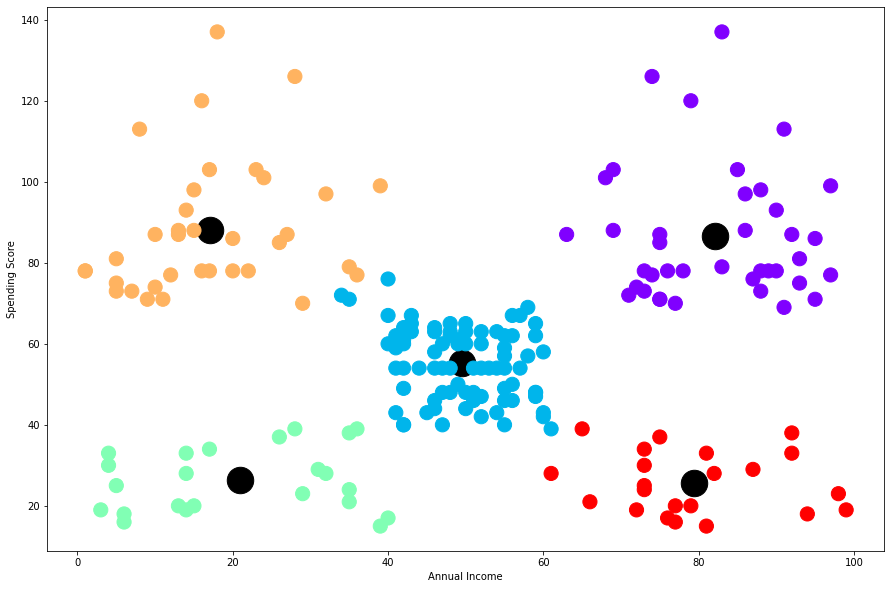

In [10]:
################# Applying Kmeans clustering for segmentation #############
N=5
kmeans = KMeans(n_clusters = N).fit(df.values)
centroids = kmeans.cluster_centers_
plt.figure(figsize=(15,10))
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,0],s=700,c='black')

plt.scatter(df.values[:,1],df.values[:,0], c = kmeans.labels_, cmap ="rainbow",s=200)
plt.xlabel("Annual Income")
plt.ylabel('Spending Score')
plt.show()

In [11]:
##########  Segment labels associated with Customers  ##################
data["segment"] = kmeans.labels_
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),segment
CustomerID,,,,,
1,1,19,15,39,2
2,1,21,15,81,4
3,0,20,16,6,2
4,0,23,16,77,4
5,0,31,17,40,2
...,...,...,...,...,...
196,0,35,120,79,0
197,0,45,126,28,3
198,1,32,126,74,0


In [12]:
MEMBERS = []
SIZE = []
MEAN_INCOME = []
MEAN_SPENDING_SCORE = []

for i in range(N):
    segment_data = data[data["segment"]==i]
    members = segment_data.index
    size = len(members)
    mean_income = round(segment_data.describe().mean()["Annual Income (k$)"],3)
    mean_spending_score = round(segment_data.describe().mean()["Spending Score (1-100)"],3)

    MEMBERS.append(members.values)
    SIZE.append(size)
    MEAN_INCOME.append(mean_income)
    MEAN_SPENDING_SCORE.append(mean_spending_score)
    

    print(f"\nSegment {i} size is {size}")
    print("Mean annual income:${}".format(mean_income))
    print("Mean spending score:${}".format(mean_spending_score))
    print("Members  customer IDs are:\n",members.values)



Segment 0 size is 39
Mean annual income:$74.669
Mean spending score:$67.249
Members  customer IDs are:
 [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]

Segment 1 size is 81
Mean annual income:$53.036
Mean spending score:$47.631
Members  customer IDs are:
 [ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 127 133 143]

Segment 2 size is 23
Mean annual income:$23.587
Mean spending score:$19.991
Members  customer IDs are:
 [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]

Segment 3 size is 35
Mean annual income:$75.825
Mean spending score:$18.946
Members  customer IDs are:
 [125 129 131 135 13

In [13]:
SEGMENTED_DATA = pd.DataFrame({"segment":range(N),"size":SIZE,"mean_annual_income":MEAN_INCOME,\
                               "mean_spending_score":MEAN_SPENDING_SCORE,"members_customer_ids":MEMBERS})

SEGMENTED_DATA

,segment,size,mean_annual_income,mean_spending_score,members_customer_ids
0,0,39,74.669,67.249,"[124, 126, 128, 130, 132, 134, 136, 138, 140, ..."
1,1,81,53.036,47.631,"[44, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 5..."
2,2,23,23.587,19.991,"[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25..."
3,3,35,75.825,18.946,"[125, 129, 131, 135, 137, 139, 141, 145, 147, ..."
4,4,22,23.162,63.452,"[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 2..."
